<a href="https://colab.research.google.com/github/lilian662/EDO/blob/main/EdpIactividad11_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

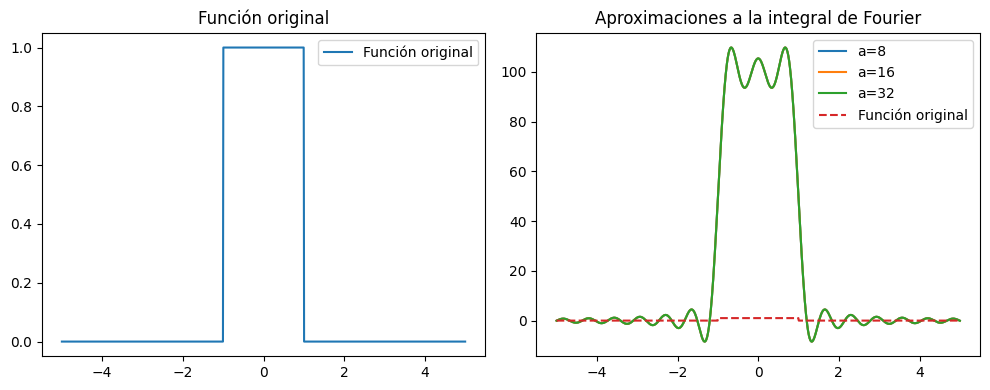

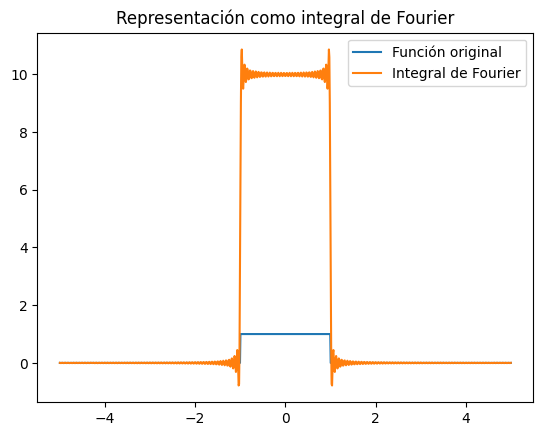

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir la variable simbólica
x, w = sp.symbols('x w')

# Definir la función pulso unitario
f = sp.Piecewise((1, sp.And(x >= -1, x <= 1)), (0, True))

# Graficar la función original
x_vals = np.linspace(-5, 5, 1000)
y_vals = np.where(np.abs(x_vals) <= 1, 1, 0)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label='Función original')
plt.legend()
plt.title('Función original')

# Calcular la representación como integral de Fourier
A = sp.integrate(f*sp.cos(w*x), (x, -sp.oo, sp.oo))
B = sp.integrate(f*sp.sin(w*x), (x, -sp.oo, sp.oo))

# Aproximación a la integral impropia
a_vals = [8, 16, 32]
for a in a_vals:
    A_approx = sp.integrate(f*sp.cos(w*x), (x, -a, a))
    B_approx = sp.integrate(f*sp.sin(w*x), (x, -a, a))

    # Convertir a función lambda para evaluar en numpy
    A_lambda = sp.lambdify(w, A_approx, 'numpy')
    B_lambda = sp.lambdify(w, B_approx, 'numpy')

    w_vals = np.linspace(-10, 10, 1000)
    integral_vals = (1/np.pi) * (A_lambda(w_vals)*np.cos(w_vals*x_vals[:, None]) + B_lambda(w_vals)*np.sin(w_vals*x_vals[:, None]))
    integral_vals = np.sum(integral_vals, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(x_vals, integral_vals, label=f'a={a}')

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, label='Función original', linestyle='--')
plt.legend()
plt.title('Aproximaciones a la integral de Fourier')
plt.tight_layout()
plt.show()

# Representación como integral de Fourier
A_lambda = sp.lambdify(w, A, 'numpy')
B_lambda = sp.lambdify(w, B, 'numpy')

w_vals = np.linspace(-100, 100, 1000)
integral_vals = (1/np.pi) * (A_lambda(w_vals)*np.cos(w_vals*x_vals[:, None]) + B_lambda(w_vals)*np.sin(w_vals*x_vals[:, None]))
integral_vals = np.sum(integral_vals, axis=1)

plt.figure()
plt.plot(x_vals, y_vals, label='Función original')
plt.plot(x_vals, integral_vals, label='Integral de Fourier')
plt.legend()
plt.title('Representación como integral de Fourier')
plt.show()